
Initial Dataset:
    Student_ID  Math_Score  Science_Score  English_Score  Attendance_Rate
0         101        85.0           80.0           78.0             0.92
1         102        90.0           85.0           83.0             0.85
2         103        78.0           79.0            NaN             0.88
3         104         NaN           82.0           77.0             0.95
4         105        95.0           90.0           85.0             0.80
5         106        88.0            NaN           80.0             0.75
6         107        76.0           75.0           74.0              NaN
7         108        92.0           88.0           90.0             0.90
8         109        89.0           84.0           86.0             0.89
9         110       450.0           83.0           82.0             0.91

Missing Values:
 Student_ID         0
Math_Score         1
Science_Score      1
English_Score      1
Attendance_Rate    1
dtype: int64

Dataset after handling missing values:
  

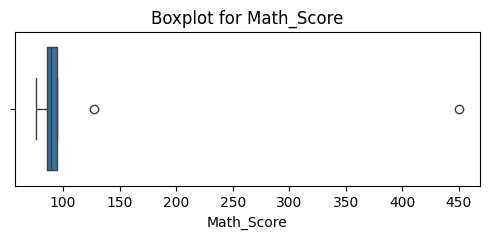

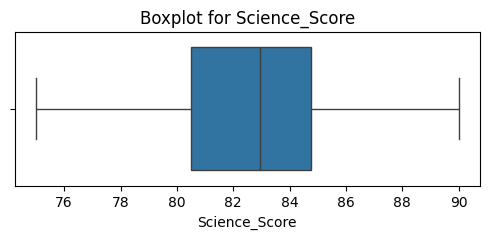

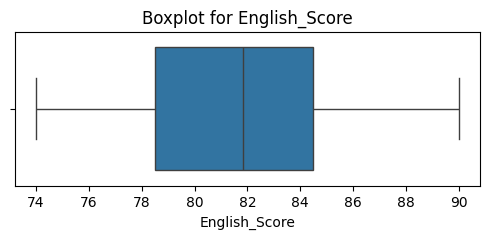

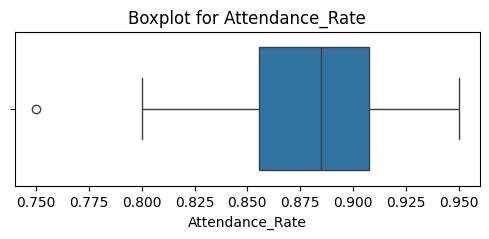


Dataset after handling outliers:
    Student_ID  Math_Score  Science_Score  English_Score  Attendance_Rate
0         101       85.00      80.000000      78.000000         0.920000
1         102       90.00      85.000000      83.000000         0.850000
2         103       78.00      79.000000      81.666667         0.880000
3         104      127.00      82.000000      77.000000         0.950000
4         105       95.00      90.000000      85.000000         0.800000
5         106       88.00      82.888889      80.000000         0.750000
6         107       76.00      75.000000      74.000000         0.872222
7         108       92.00      88.000000      90.000000         0.900000
8         109       89.00      84.000000      86.000000         0.890000
9         110      420.93      83.000000      82.000000         0.910000

Dataset after Log Transformation:
    Math_Score  Math_Score_Log
0       85.00        4.454347
1       90.00        4.510860
2       78.00        4.369448
3     

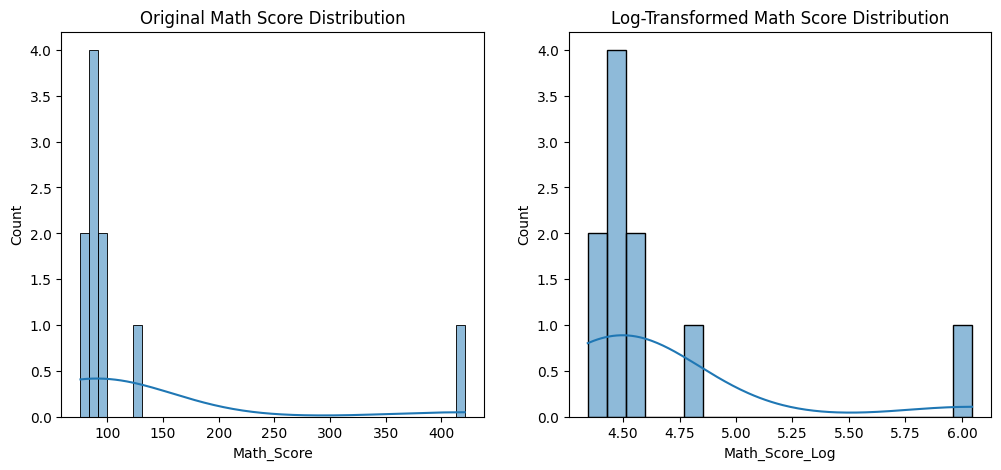

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample "Academic performance" dataset
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Math_Score': [85, 90, 78, np.nan, 95, 88, 76, 92, 89, 450],  # 450 is an outlier
    'Science_Score': [80, 85, 79, 82, 90, np.nan, 75, 88, 84, 83],
    'English_Score': [78, 83, np.nan, 77, 85, 80, 74, 90, 86, 82],
    'Attendance_Rate': [0.92, 0.85, 0.88, 0.95, 0.80, 0.75, np.nan, 0.90, 0.89, 0.91]
}

df = pd.DataFrame(data)
print("\nInitial Dataset:\n", df)

# 1. Scan all variables for missing values and inconsistencies
print("\nMissing Values:\n", df.isnull().sum())

# Handling missing values
# We'll fill numeric missing values with the mean of that column
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())
df['English_Score'] = df['English_Score'].fillna(df['English_Score'].mean())
df['Attendance_Rate'] = df['Attendance_Rate'].fillna(df['Attendance_Rate'].mean())


print("\nDataset after handling missing values:\n", df)

# 2. Scan numeric variables for outliers
# Let's plot boxplots to detect outliers
numeric_cols = ['Math_Score', 'Science_Score', 'English_Score', 'Attendance_Rate']

for col in numeric_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Dealing with outliers
# We'll cap the Math_Score at 99th percentile
q99 = df['Math_Score'].quantile(0.99)
df['Math_Score'] = np.where(df['Math_Score'] > q99, q99, df['Math_Score'])

print("\nDataset after handling outliers:\n", df)

# 3. Apply Data Transformation
# Let's apply a log transformation to 'Math_Score' to reduce skewness
# Add 1 to avoid log(0) error
df['Math_Score_Log'] = np.log1p(df['Math_Score'])

print("\nDataset after Log Transformation:\n", df[['Math_Score', 'Math_Score_Log']])

# Let's visualize distribution before and after
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Math_Score'], kde=True)
plt.title('Original Math Score Distribution')

plt.subplot(1,2,2)
sns.histplot(df['Math_Score_Log'], kde=True)
plt.title('Log-Transformed Math Score Distribution')

plt.show()
